In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
location=r"C:\Users\manda\OneDrive\Desktop\Data Science\Machine learning assignment\Logistic regression\bank-full.csv"

In [3]:
bank=pd.read_csv(location,delimiter=";", quotechar='"')

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# we can see that there is no null value present in the dataset till now

In [7]:
# here we can see counting categories 
for i in list(bank.columns):
    a=bank[i].value_counts()
    print(a)
    print()
    print('----------------------------------next column value_counts-------------------------------')
    print()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

----------------------------------next column value_counts-------------------------------

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

----------------------------------next column value_counts-------------------------------

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

----------------------------------next column value_counts-------------------------------

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

----------------------------------next column value_counts-------------------------------


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
bank.rename(columns={'y': 'subscribed'}, inplace=True)

In [14]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
li=['job','marital','education','default','housing','loan','contact','month','duration','poutcome','subscribed']
for i in li:
    bank[i]=bank[i].astype('category')

In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         45211 non-null  int64   
 1   job         45211 non-null  category
 2   marital     45211 non-null  category
 3   education   45211 non-null  category
 4   default     45211 non-null  category
 5   balance     45211 non-null  int64   
 6   housing     45211 non-null  category
 7   loan        45211 non-null  category
 8   contact     45211 non-null  category
 9   day         45211 non-null  int64   
 10  month       45211 non-null  category
 11  duration    45211 non-null  category
 12  campaign    45211 non-null  int64   
 13  pdays       45211 non-null  int64   
 14  previous    45211 non-null  int64   
 15  poutcome    45211 non-null  category
 16  subscribed  45211 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.6 MB


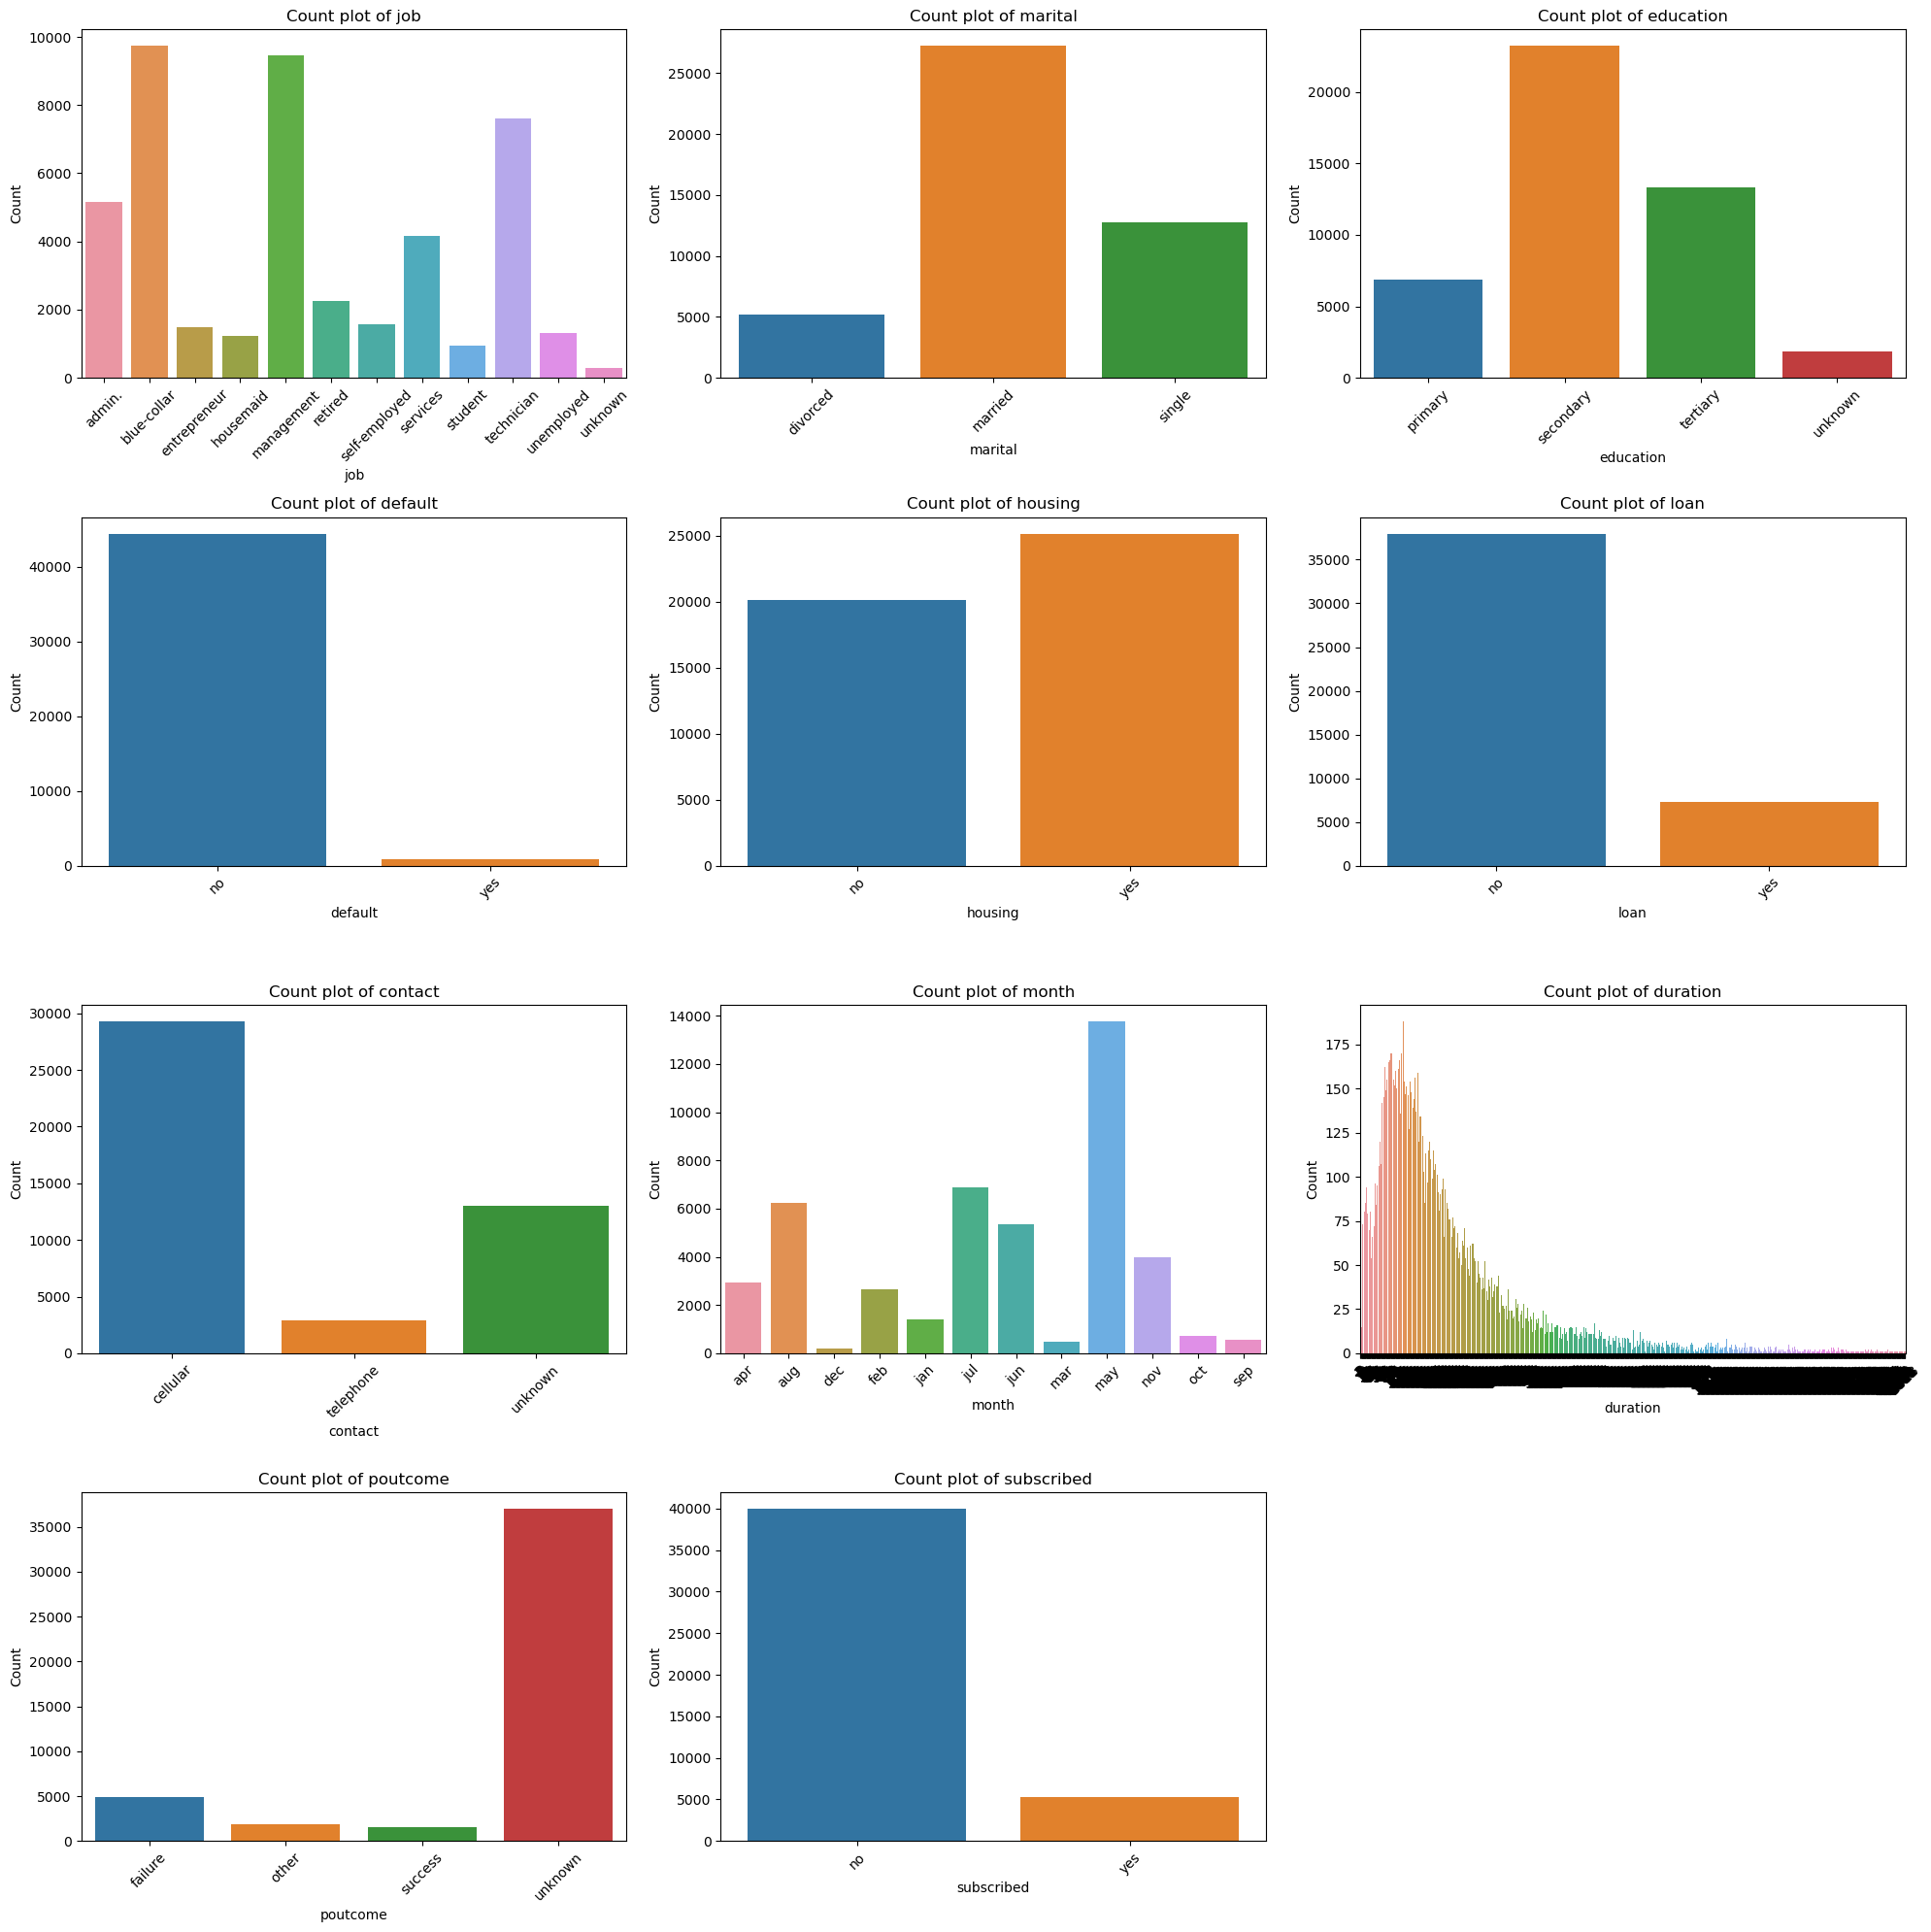

In [29]:
# lets plot countplot for all categorical variable
fig, axes = plt.subplots(len(li) // 3 + 1, 3, figsize=(20,20))
axes = axes.flatten()     
for i, col in enumerate(li):
    sns.countplot(data=bank, x=col, ax=axes[i])
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# to remove unused subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusts the layout to prevent overlap.
plt.tight_layout()


In [31]:
li1=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

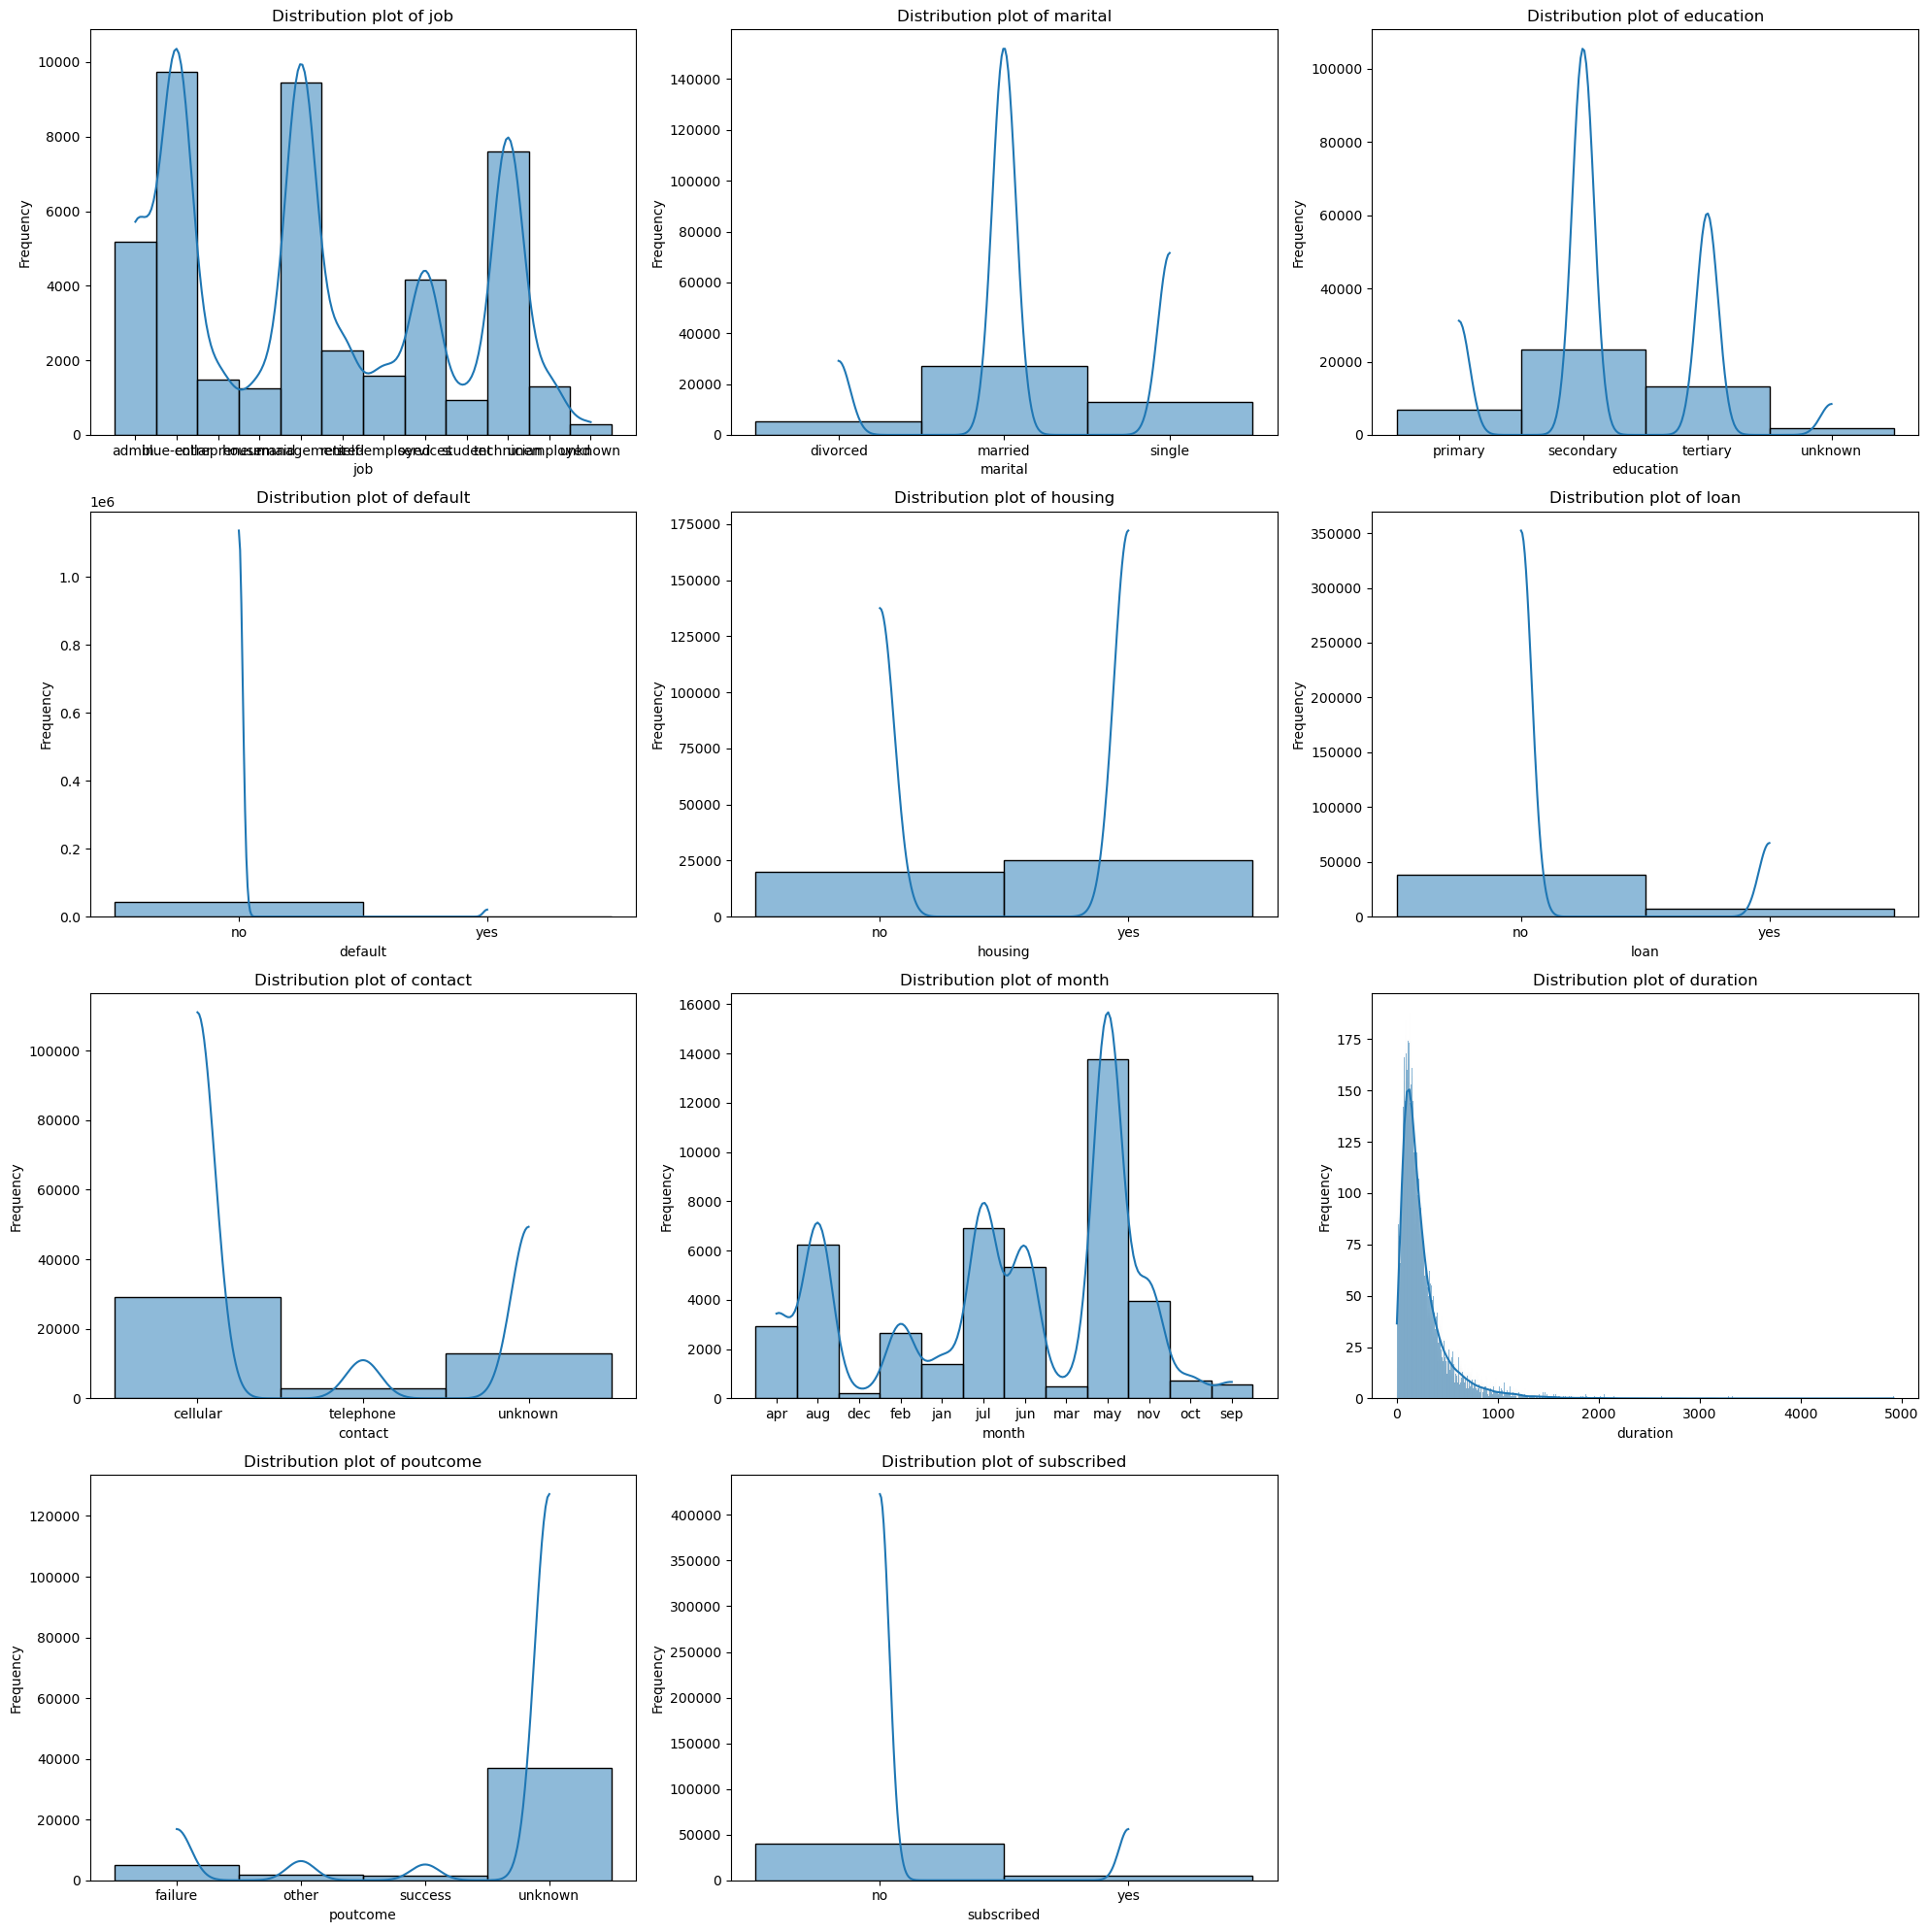

In [33]:
# lets plot the Histogram for numerical columns
fig, axes1 = plt.subplots(len(li) // 3 + 1, 3, figsize=(20,20))
axes1 = axes1.flatten()

for i, col in enumerate(li):
    sns.histplot(bank[col], kde=True, ax=axes1[i])
    axes1[i].set_title(f'Distribution plot of {col}')
    axes1[i].set_xlabel(col)
    axes1[i].set_ylabel('Frequency')


# to remove unused subplot
for j in range(i + 1, len(axes1)):
    fig.delaxes(axes1[j])

# Adjusts the layout to prevent overlap.
plt.tight_layout()


In [39]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()

In [43]:
for col in li:
    bank[col] = le.fit_transform(bank[col])


In [44]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,975,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1116,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [45]:
# train test split
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(bank.drop('subscribed',axis=1), 
                                                    bank['subscribed'], test_size=0.25, 
                                                     random_state=101)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [56]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LogisticRegression

In [60]:
model=LogisticRegression(max_iter=100)

In [61]:
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [64]:
y_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})
y_pred_df

,actual,predicted
37199,0,0
20751,0,0
554,0,0
37464,0,0
35798,0,0
...,...,...
11042,0,0
12710,0,0
19686,0,0
32321,0,0


In [65]:
# now we will check accuracy of model

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[9759  186]
 [1029  329]]


In [66]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [67]:
accuracy

0.8925064142263116

In [69]:
# ROC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')


ROC AUC Score: 0.87


In [70]:
# compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

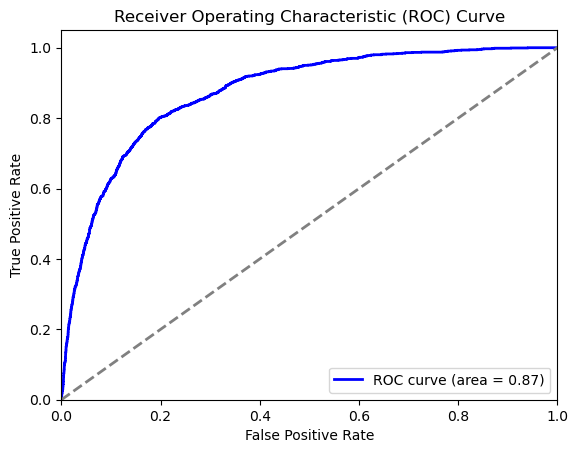

In [71]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Thank You